In [103]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "serif",
    "font.serif" : ["Times"]
})

from scipy.linalg import eigh, norm, det
from scipy.optimize import curve_fit

In [3]:
def func(x,a,b):
    
    return a*np.exp(-x/b)

In [4]:
def upp_db(t1,t2,t3,N=1000):
    
    dk = 2*np.pi/N
    k = np.linspace(-np.pi,np.pi-dk,N)
    
    temp = t1**2 + t2**2 + t3**2 + 2*t2*t3*np.cos(k) 
    
    return np.sqrt(temp)

# Stub lattice

In this section, we diagonalise the stub lattice. It consists of three sublattices and it displays a flat band due to chiral symmetry.

In [10]:
N = 100 #number of primitive cells
n = 3*N #number of points

# Hopping terms
t = 1
mu = 100
t1 = t*np.sqrt(mu) 
t2 = t3 = t

We build the Hamiltonian.

In [11]:
H = np.zeros((3*N,3*N))
H += np.diag([t1]*N + [t2]*N,k=N)
H += np.diag([0]*(N+1)+[t3]*(N-1)+[0],k=N-1)

H[N,-1] = t3

H += np.transpose(np.conjugate(H))

We diagonalise it.

In [12]:
eigval, eigvect = eigh(H)

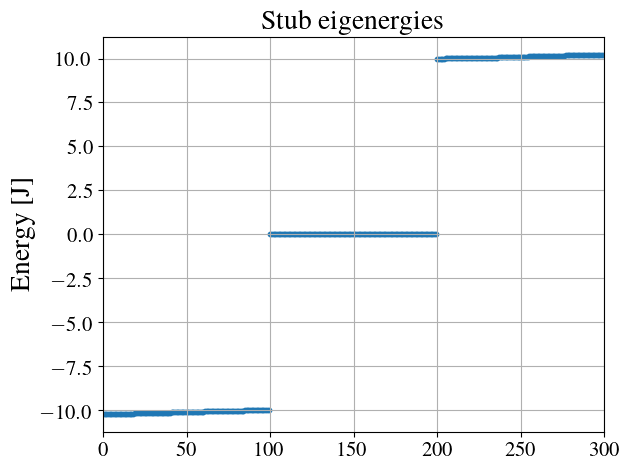

In [13]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigval)),eigval,s=10)

ax.set_title("Stub eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigval))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

We display a FB eigenstate. Notice that the wave amplitude is zero in sites corresponding to the $|b\rangle$ sublattice.

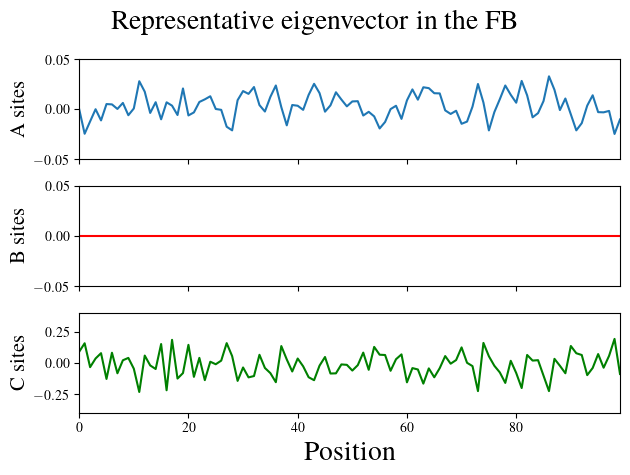

In [14]:
fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True,tight_layout=1)

plt.suptitle("Representative eigenvector in the FB",fontsize = 20)

s = 150
x = np.arange(0,N,1)
ax[0].plot(x,eigvect[:N,s])
ax[1].plot(x,eigvect[N:2*N,s],c="r")
ax[2].plot(x,eigvect[2*N:3*N,s],c="g")

ax[0].set_xlim(0,N-1)
ax[0].set_ylim(-0.05,0.05)
ax[1].set_ylim(-0.05,0.05)
ax[2].set_ylim(-0.4,0.4)

ax[0].set_ylabel("A sites",fontsize=15)
ax[1].set_ylabel("B sites",fontsize=15)
ax[2].set_ylabel("C sites",fontsize=15)
ax[2].set_xlabel("Position", fontsize=20)

plt.show()

In [ ]:
if False:    
    cm = 2.54
    fig = plt.figure(figsize=(6*cm,5*cm),tight_layout=0)

    t = np.linspace(-np.pi,np.pi,1000,endpoint=True)

    plt.plot(t,upp_db(t1,t2,t3),lw=15)
    plt.plot(t,-upp_db(t1,t2,t3),lw=15)
    plt.plot(t,0*np.ones(1000),lw=15)


    up_min = np.min(upp_db(t1,t2,t3))
    up_max = np.max(upp_db(t1,t2,t3))
    lo_min = -up_max
    lo_max = -up_min
    plt.fill_between(t,up_min,up_max,color="lightsteelblue",alpha=0.3)
    plt.fill_between(t,lo_min,lo_max,color="#dede00",alpha=0.2)

    plt.xlim(-np.pi,np.pi)

    plt.xticks([-np.pi,0,np.pi],[""]*3,fontsize=15)
    plt.yticks([0]*3,[""]*3,fontsize=15)


    #plt.savefig("stub.png")
    plt.show()

# Local coupling of an emitter: geometric BS

In this section, we explore the emergence of a geometric BS in the limit $\mu \gg 1$. The key signature of a geometric BS is a localization length $\lambda_{\rm BS}$ independent of the emitter's frequency $\omega_{\rm eg}$. Different FBs are characterized by different geometric length, as they are related to different shapes of CLSs.

In [15]:
N = 100 #number of primitive cells
n = 3*N #number of points

# Hopping terms
t = 1
mu = 10
t1 = t*np.sqrt(mu) 
t2 = t
t3 = t

## Zero-energy FB

We calculate the geometric localization length.

In [102]:
l_bs = -1/np.log((2+mu)/2 *(1 - np.sqrt(1- 4*(2+mu)**(-2))))
l_bs

0.403569372497037

We couple an atom to a site of the $|a\rangle$ sublattice.

In [103]:
g = 0.1
om_eg = 0.1

pos = N//2 #+ 2*N

We build and diagonalise the Hamiltonian.

In [104]:
H = np.zeros((3*N+1,3*N+1))
H += np.diag([t1]*N + [t2]*N+[0],k=N)
H += np.diag([0]*(N+1)+[t3]*(N-1)+[0,0],k=N-1)

H[N,-2] = t3

H[-1,pos] = g
H += np.transpose(np.conjugate(H))
H[-1,-1] = om_eg

In [105]:
eigval, eigvect = eigh(H)

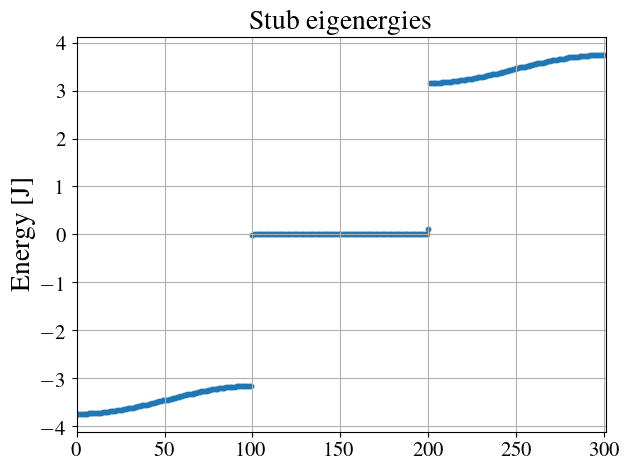

In [106]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigval)),eigval,s=10)

ax.set_title("Stub eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigval))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

We select the BS out of the retrieved set of eigenstates.

In [107]:
bs = eigvect[:-1,N]
bs /= norm(bs)

In [108]:
popt, pcov = curve_fit(func,x[pos:]-pos, abs(bs[pos+2*N:]))

print(f"Estimated localization length: {popt[1]:.13f} \u00B1 {np.sqrt(pcov[1,1]):.13f}")

Estimated localization length: 0.4035719283916 ± 0.0000000000000


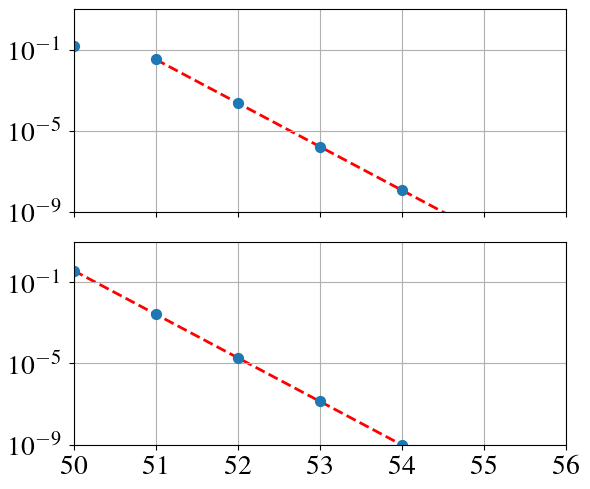

In [118]:
cm = 2.54
fig, ax = plt.subplots(figsize=(6,5),nrows=2,ncols=1,sharex=True,tight_layout=1)

x = np.arange(0,N,1)
ax[0].scatter(x,abs(bs[:N])**2,zorder=2,s=50)
ax[0].plot(x[pos:]+1,func(2*abs(x[pos:]-pos),abs(bs[pos+1])**2,l_bs),ls="--",
           c="red",lw=2,zorder=1)
ax[0].plot(np.flip(x[:pos]),func(2*abs(x[pos:]-pos),abs(bs[pos-1])**2,l_bs),ls="--",
           c="red",lw=2,zorder=1)

ax[1].scatter(x,abs(bs[2*N:3*N])**2,zorder=2,s=50)
ax[1].plot(x[pos:],func(2*abs(x[:pos]),abs(bs[pos+2*N])**2,l_bs),ls="--",
          c="red",lw=2,zorder=1)
ax[1].plot(np.flip(x[:pos]),func(2*abs(x[:pos]),abs(bs[pos+2*N])**2,l_bs),ls="--",
          c="red",lw=2,zorder=1)

ax[0].set_xlim(N//2,N//2+6)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_ylim(1e-9,10)
ax[1].set_ylim(1e-9,10)

ax[0].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

ax[0].grid()
ax[1].grid()

#plt.savefig("geom_BS.png")
plt.show()

### Plot

In [63]:
N = 100 #number of primitive cells
n = 3*N #number of points

# Hopping terms
t = 1
mu = np.array([0.05,0.1,0.5,1,4,10,100])
alpha = 1/(2+mu)
t1 = t*np.sqrt(mu) 
t2 = t
t3 = t

In [64]:
g = 0.1
om_eg = 0.1

pos = N//2 #+ 2*N

In [65]:
bs = np.zeros((3*N,len(mu)))
l_est = np.zeros(len(mu))

for i in range(0,len(mu)):

    H = np.zeros((3*N+1,3*N+1))
    H += np.diag([t1[i]]*N + [t2]*N+[0],k=N)
    H += np.diag([0]*(N+1)+[t3]*(N-1)+[0,0],k=N-1)

    H[N,-2] = t3

    H[-1,pos] = g
    H += np.transpose(np.conjugate(H))
    H[-1,-1] = om_eg
    
    _ , eigvect = eigh(H)
    
    bs[:,i] = eigvect[:-1,N]
    bs[:,i] /= norm(bs[:,i])
    
    popt, _ = curve_fit(func,x[pos:]-pos, abs(bs[pos+2*N:,i]))
    l_est[i] = popt[1]

In [66]:
for i in range(len(mu)):
    bs[:,i] /= abs(bs[2*N + N//2,i])

In [85]:
mu1 = np.linspace(0.01,10000,300000)
alpha1 = 1/(2+mu1)
l_bs = -1/np.log((1 - np.sqrt(1- 4*(alpha1)**2))/(2*alpha1))

In [86]:
l_est

array([4.63133481, 3.22315135, 1.44560248, 1.03980054, 0.56732822,
       0.40357193, 0.21622198])

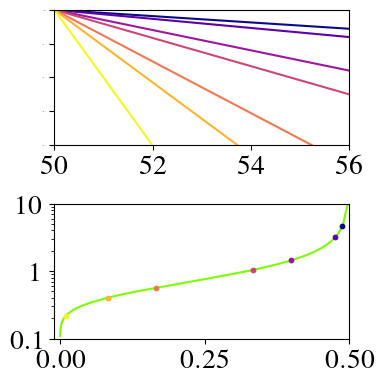

In [108]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(10*cm,10*cm),nrows=2,ncols=1,tight_layout=1)

x = np.arange(0,N,1)

colors = plt.cm.plasma(np.linspace(0,1,len(mu)))

for i in range(len(mu)):
    ax[0].plot(x,abs(bs[2*N:3*N,i])**2,color=colors[i])
    ax[1].scatter(alpha[i],l_est[i],zorder=2,color=colors[i],s=10)

ax[1].plot(alpha1,l_bs,zorder=1,c="lawngreen")

    
ax[0].set_xlim(N//2,N//2+6)
ax[0].set_yscale("log")
ax[0].set_ylim(1e-8,1)
ax[0].tick_params(axis='y', labelsize=0)
ax[0].tick_params(axis='x', labelsize=20)
#ax[0].set_xlabel("Points aaaaaa",color="white")

ax[1].set_ylim(1e-1,1e1)
ax[1].set_xlim(-0.01,0.5)
ax[1].set_yscale("log")
ax[1].set_xticks([0,0.25,0.5])
ax[1].set_yticks([0.1,1,10])
ax[1].set_yticklabels([0.1,1,10])
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)

plt.savefig("panel.png")
plt.show()

## Nearly FB at $\omega = \pm t_1$

We couple an atom to an $|a\rangle$ site.

In [711]:
g = 0.1
om_a = -t1 - 0.1

pos = N//2

In [712]:
H = np.zeros((3*N+1,3*N+1))
H += np.diag([t1]*N + [t2]*N+[0],k=N)
H += np.diag([0]*(N+1)+[t3]*(N-1)+[0,0],k=N-1)

H[N,-2] = t3

H[-1,pos] = g
H += np.transpose(np.conjugate(H))
H[-1,-1] = om_a

In [713]:
eigval, eigvect = eigh(H)

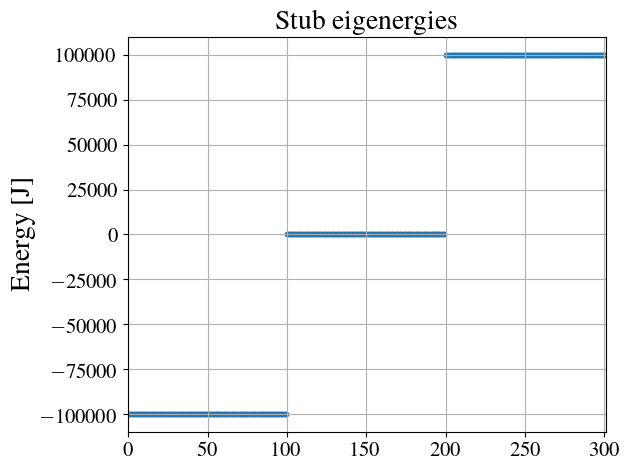

In [714]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigval)),eigval,s=10)

ax.set_title("Stub eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigval))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

In [715]:
bs = eigvect[:-1,2*N]
bs /= norm(bs)

In [716]:
popt, pcov = curve_fit(func,x[pos:]-pos, abs(bs[pos:N]))

print(f"Estimated localization length: {popt[1]:.13f} \u00B1 {np.sqrt(pcov[1,1]):.13f}")

Estimated localization length: 0.0978909538011 ± 0.0000000052351


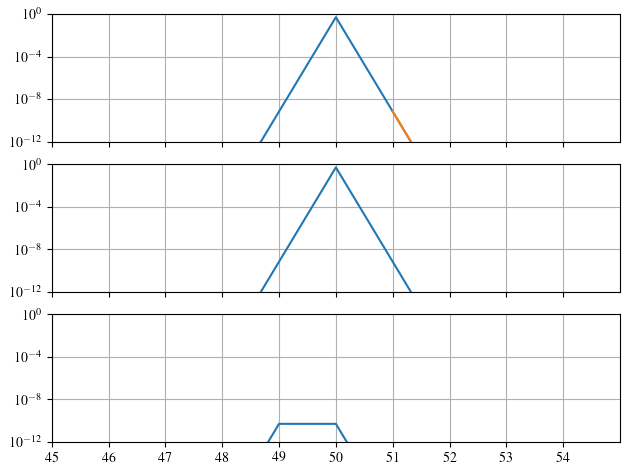

In [717]:
fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True,tight_layout=1)

x = np.arange(0,N,1)
ax[0].plot(x,abs(bs[:N])**2,zorder=2)
ax[0].plot(x[pos+1:],abs(bs[pos+1]**2)*np.exp(-2*abs(x[pos+1:]-pos-1)/popt[1]),label="Fit",zorder=2)
ax[1].plot(x,abs(bs[N:2*N])**2,zorder=2)
ax[2].plot(x,abs(bs[2*N:3*N])**2,zorder=2)

ax[0].set_xlim(N//2-5,N//2+5)
ax[2].set_xticks(np.arange(N//2-5,N//2+5,1))
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[2].set_yscale("log")
ax[0].set_ylim(1e-12,1)
ax[1].set_ylim(1e-12,1)
ax[2].set_ylim(1e-12,1)

ax[0].grid()
ax[1].grid()
ax[2].grid()

plt.show()

# Comparison between localization lengths

In [16]:
gam, l = np.loadtxt("length.txt",unpack=True)
gam = gam[2:]
l = l[2:]

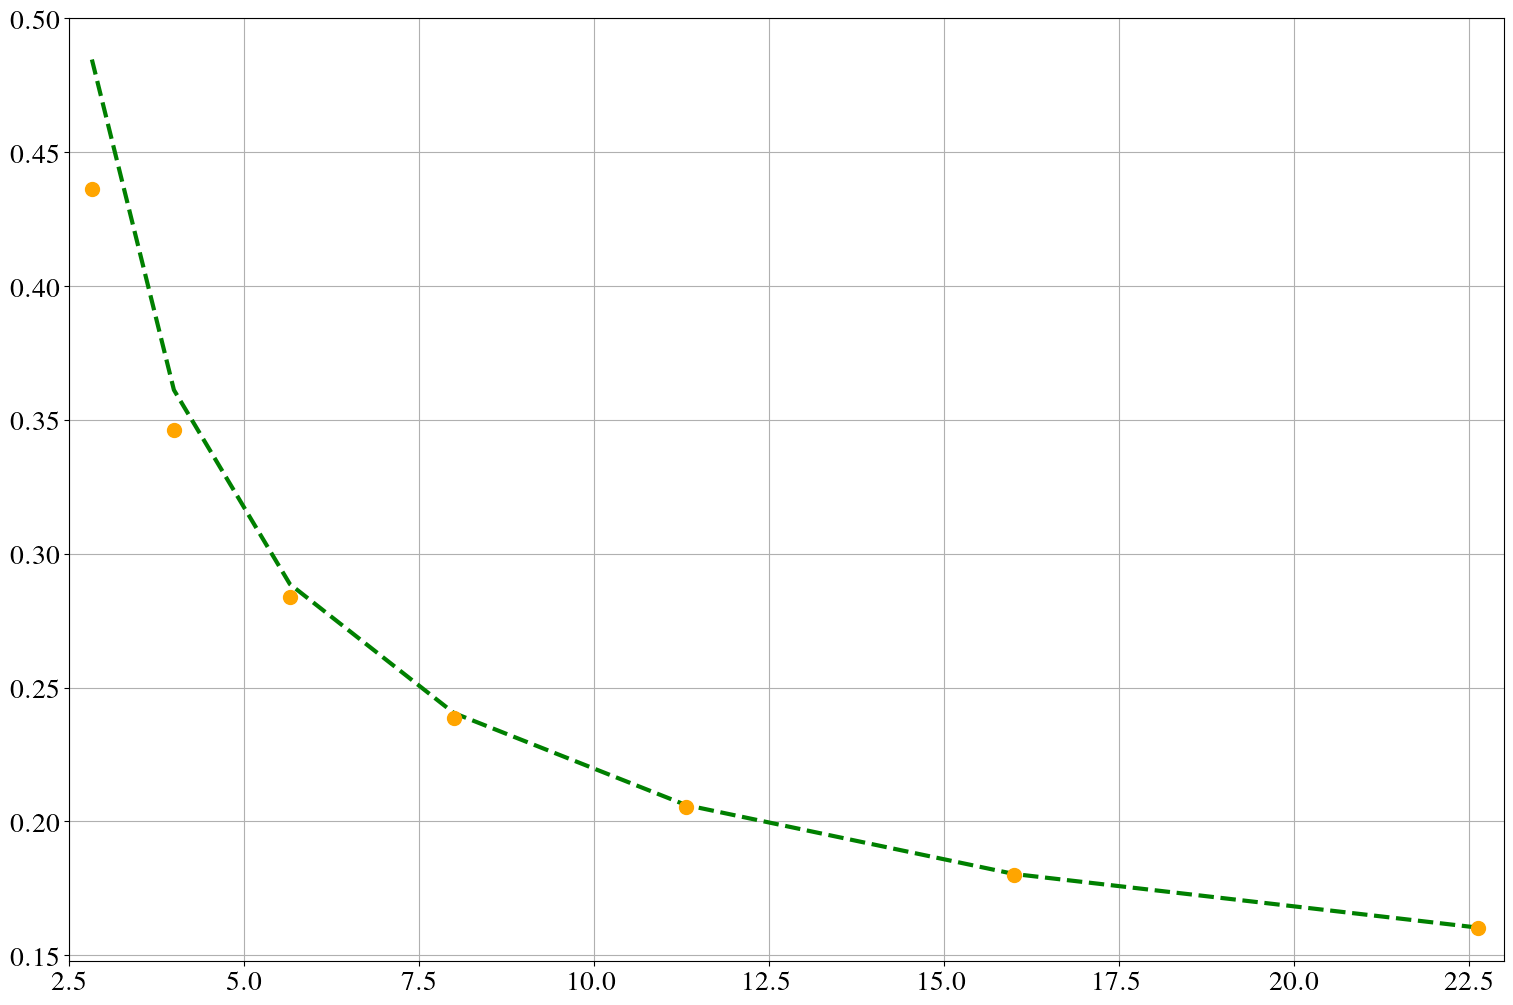

In [70]:
fig = plt.figure(figsize=(6*cm,4*cm), tight_layout=True)

plt.plot(np.sqrt(gam),-1/np.log(gam/2 - np.sqrt(gam**2 - 4)/2),ls="--",
         zorder=2,lw=3,c="green")
plt.scatter(np.sqrt(gam),l,s=100,zorder=3,c="orange")

plt.xlim(2.5,23)
plt.ylim(0.148,0.5)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()

#plt.savefig("comp_l.png")
plt.show()

In [71]:
gam2, l2 = np.loadtxt("length2.txt",unpack=True)

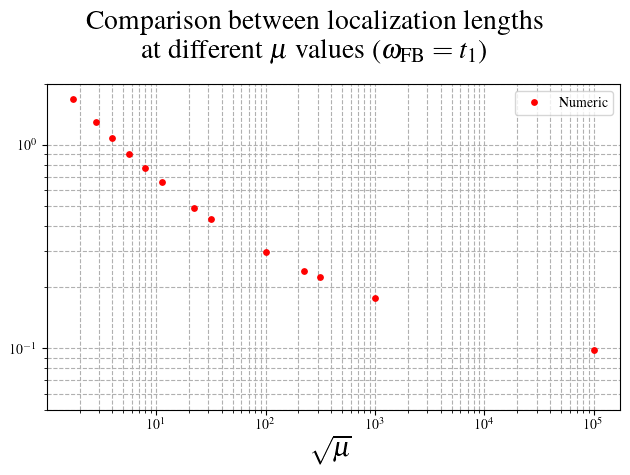

In [75]:
fig = plt.figure(tight_layout = 1)

plt.suptitle(r"Comparison between localization lengths" +"\n" 
             + r"at different $\mu$ values ($\omega_{\rm FB} = t_1$)",fontsize=20)

plt.scatter(np.sqrt(gam2),l2,s=15,c="r",zorder=3,label="Numeric")
plt.legend()

plt.xscale("log")
plt.yscale("log")
plt.ylim(5e-2,2)

plt.grid(which="both",ls="--")

plt.xlabel(r"$\sqrt{\mu}$",fontsize=20)

#plt.savefig("comp_FB_1.png")
plt.show()